# 1. Exploratory Data Analysis

Exploring the data is the first step in any data science project

#### Data types

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Numeric</td>
        <td>Data that are expressed on a numeric scale.</td>
    </tr>
     <tr>
        <td><i>Continuous</i></td>
        <td>Data that can take on any (numeric) value in an interval.</td>
    </tr>
     <tr>
        <td><i>Discrete</i></td>
        <td>Data that can take only integer values, such as counts.</td>
    </tr>
      <tr>
        <td>Categorical</td>
        <td>Data that can take only a specific set of values, representing a set of possible categories.</td>
    </tr>
    <tr>
        <td><i>Binary</i></td>
        <td>A special case of categorical data with just two categories of values, e.g. 0/1, true/false.</td>
    </tr>
    <tr>
        <td><i>Ordinal</i></td>
        <td>Categorical data that has an explicit ordering.</td>
    </tr>
</table>

#### Rectangular data

_Rectangular data_ is the general term for a two-dimensional matrix with rows indicating records (cases) and columns indicating features (variables)

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Data frame</td>
        <td>Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning models.</td>
    </tr>
     <tr>
        <td>Feature</td>
        <td>A column within a table is commonly referred to as a <i>feature</i>.</td>
    </tr>
     <tr>
        <td>Outcome</td>
        <td>Many data science projects involve predicting an <i>outcome</i>. The <i>features</i> are some times used to predict the <i>outcome</i> in an experiment or study</td>
    </tr>
      <tr>
        <td>Records</td>
        <td>A row within a table is commonly referred to as a <i>record</i>.</td>
    </tr>
</table>

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
from statsmodels.robust.scale import mad

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Estimates of location

A basic step in exploring your data is getting a "typical value" for each feature (variable): an estimate of where most of the data is located.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
        <th>Formula</th>
    </tr>
    <tr>
        <td>Mean</td>
        <td>The sum of all values divided by the number of values.</td>
        <td style="font-size: 1.5em">$\bar{x} = {{\sum_{i=1}^n x_i} \over n}$</td>
    </tr>
    <tr>
        <td>Weighted Mean</td>
        <td>The sum of all values times a weight divided by the sum of the weights.</td>
        <td style="font-size: 1.5em">$\bar{x_w}={{\sum_{i=1}^n w_i x_i} \over \sum_{i=1}^n w_i}$</td>
    </tr>
    <tr>
        <td>Trimmed mean</td>
        <td>The average of all values after dropping a fixed number of extreme values.</td>
        <td style="font-size: 1.5em">$\bar{x} = {{\sum_{i=p+1}^{n-p} x_i} \over {n-2p}}$</td>
    </tr>
    <tr>
        <td>Median</td>
        <td>The value such that one half of the data lies above an below (50th percentile).</td>
    </tr>
    <tr>
        <td>Percentile</td>
        <td>The values such that P percent of the data lies below.</td>
    </tr>
    <tr>
        <td>Weighted median</td>
        <td>The values such that one-half of the sum of the weights lies above and below the sorted data.</td>
    </tr>
    <tr>
        <td>Robust</td>
        <td>Not sensitive to extreme values.</td>
    </tr>
    <tr>
        <td>Outlier</td>
        <td>A data value that is very different from most of the data.</td>
    </tr>
</table>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/state.csv')
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
# Compute the mean of population
print('Mean:', df['Population'].mean())

# Compute the trimmed mean of population
# Use scipy.stats.trim_mean function
print('Trimmed mean:', trim_mean(df['Population'], 0.1))

# Compute the trimmed mean of population
print('Median:', df['Population'].median())

# Weighted mean of Murder.Rate where weights are Population
# Use np.average
print('Weighted mean:', np.average(df['Murder.Rate'], weights=df['Population']))

# Weighted median of Murder.Rate where weights are Population
# Use wquantiles.median
print('Weighted median:', wquantiles.median(df['Murder.Rate'], weights=df['Population']))

Mean: 6162876.3
Trimmed mean: 4783697.125
Median: 4436369.5
Weighted mean: 4.445833981123393
Weighted median: 4.4


#### Estimates of variability

A second dimension, _variability_, also referred to as _dispersion_, measures whether the data values are tightly clustered or spread out.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
        <th>Formula</th>
    </tr>
    <tr>
        <td>Deviations</td>
        <td>The difference between the observed values and the estimate of location.</td>
    </tr>
    <tr>
        <td>Variance</td>
        <td>The sum of squared deviations from the mean divided by _n - 1_ where _n_ is the number of data values.</td>
        <td style="font-size: 1.5em">$s^2 = {{\sum_{i=1}^n (x_i - \bar{x})^2} \over n - 1}$</td>
    </tr>
     <tr>
        <td>Standard deviation</td>
        <td>The square root of the variance.</td>
        <td style="font-size: 1.5em">$s = {\sqrt{s^2}}$</td>
    </tr>
     <tr>
        <td>Mean absolute deviation</td>
        <td>The mean of the absolute values of the deviations from the mean.</td>
        <td style="font-size: 1.5em">${{\sum_{i=1}^n |x_i - \bar{x}|} \over n}$</td>
    </tr>
    <tr>
        <td>Median absolute deviation from the median</td>
        <td>The median of the absolute values of the deviations from the median.</td>
    </tr>
    <tr>
        <td>Range</td>
        <td>The difference between the largest and the smallest value in a data set.</td>
    </tr>
     <tr>
        <td>Order statistics</td>
        <td>Metrics based on the data values sorted from smallest to biggest.</td>
    </tr>
    <tr>
        <td>Percentile</td>
        <td>The values such that P percent of the values take on this value or less and (100-P) percent take on this value or more.</td>
    </tr>
    <tr>
        <td>Interquartile range</td>
        <td>The difference between the 75th percentile and the 25th percentile.</td>
    </tr>
</table>

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/state.csv')
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
# Compute standard deviation of population
print('Standard deviation:', df['Population'].std())

# Compute IQR
iqr = df['Population'].quantile(0.75) - df['Population'].quantile(0.25)
print("Interquartile Range:", iqr)

# Compute Median Absolute Deviation from the median (MAD)
# Use statsmodels.robust.scale.mad
print('MAD:', mad(df['Population']))

Standard deviation: 6848235.347401142
Interquartile Range: 4847308.0
MAD: 3849876.1459979336


#### Exploring the data distribution

It is also useful to explore how the data is distributed overall

<table style='margin-left: 0; border: 1px solid'>
<tr>
    <th>Term</th>
    <th>Explanation</th>
</tr>
<tr>
    <td>Boxplot</td>
    <td>A plot introduced by Tukey as a quick way to visualize distribution of data.</td>
</tr>
<tr>
    <td>Frequency table</td>
    <td>A tally of the count of numeric data values that fall into a set of intervals (bins).</td>
</tr>
<tr>
    <td>Histogram</td>
    <td>A plot of the frequency table with the bins on the x-axis and the count on the y-axis.</td>
</tr>
<tr>
    <td>Density plot</td>
    <td>A smoothed version of the histogram, often based on <i>kernel desity estimate</i>.</td>
</tr>    
</table>

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/state.csv')
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
# Compute 5%, 25%, 50%, 75%, 95% quantiles
df['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions')

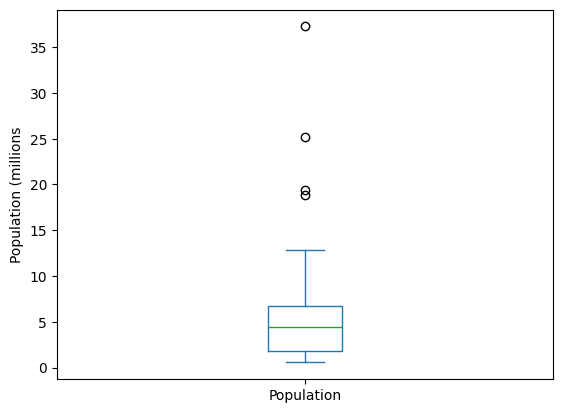

In [9]:
# Plot a boxplot
# By default, the Matplotlib function extends the whiskers to the furthest point beyond the box, 
# except that it will not go beyond 1.5 times the IQR.
ax = (df['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions')

In [11]:
# Frequency table
# A frequency table of a variable divides up the variable range into equally spaced segments and
# tells us how many values falls within each segment
binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population')

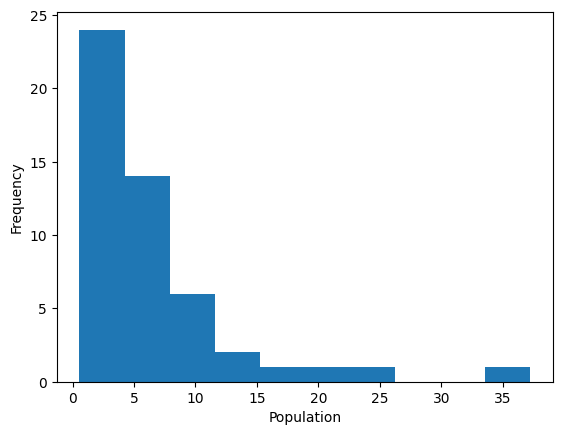

In [16]:
# Histogram
# A histogram is a way to visualize a frequency table
ax = (df['Population']/1_000_000).plot.hist()
ax.set_ylabel('Frequency')
ax.set_xlabel('Population')

Text(0.5, 0, 'Murder Rate (per 100,000)')

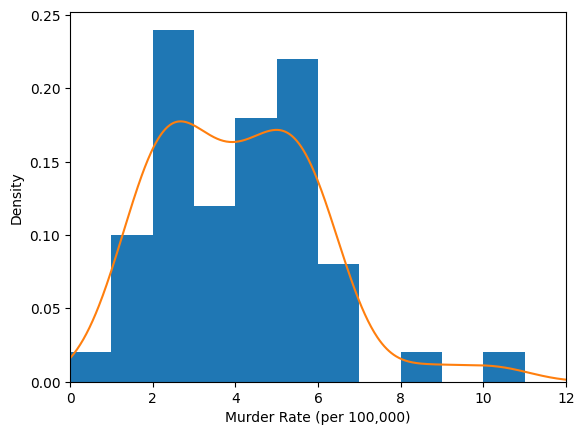

In [20]:
# Density plots and estimates
# Shows the distribution of data values as continuous values, can be thought of
# as a smoothed histogram
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(0,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

#### Exploring binary and categorical data

For categorical data, simple proportions or percentages tell the story of the data

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Mode</td>
        <td>The most commonly occurring category or values in a data set.</td>
    </tr>
    <tr>
        <td>Expected value</td>
        <td>When the categories can be associated with a numeric value, this gives an average value based on a category's probabilit of occurrence.</td>
    </tr>
    <tr>
        <td>Bar charts</td>
        <td>The frequency or proportion for each category plotted as bars.</td>
    </tr>
    <tr>
        <td>Pie charts</td>
        <td>The frequency or proportion for each category plotted as wedges in a pie.</td>
    </tr>
</table>

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/dfw_airline.csv')
df.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [4]:
print(100 * df / df.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Text(0, 0.5, 'Count')

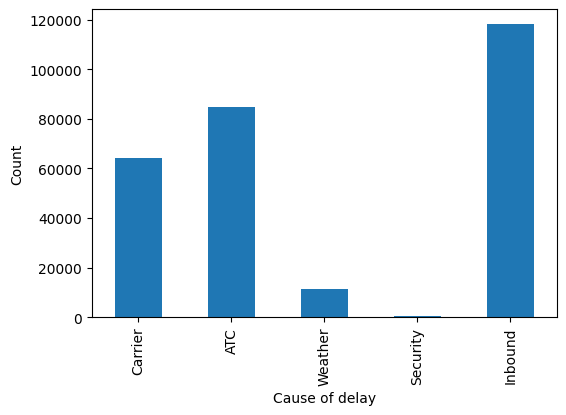

In [8]:
# Bar charts are a common visual tool for displaying a single categorical variable
ax = df.T.plot.bar(figsize=(6,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

#### Correlation

Exploratory data analysis in manu modeling projects involves examining correlation among predictors, and between predictors and a target variable.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
        <th>Formula</th>
    </tr>
    <tr>
        <td>Correlation coefficient</td>
        <td>A metric that measures the extend to which numeric variables are associated with one another.</td>
        <td style="font-size: 1.5em">$r_* = { {\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})} \over {(n-1)s_x s_y}}$</td>
    </tr>
    <tr>
        <td>Corrlation matrix</td>
        <td>A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.</td>
    </tr>
    <tr>
        <td>Scatterplot</td>
        <td>A plot in which the x-axis is the values of one variable, and the y-axis the values of another.</td>
    </tr>
</table>

\* _Pearson's correlation coefficient_: Multiply deviations from the mean for variables X times those for variable Y, divide by the product of the standard deviations.

The correlation coefficient always lies between +1 (perfect positive correlation) and -1 (perfect negative correlation); 0 indicates no correlation.

Variables can have an association that is not linear, in which case the correlation coefficient may not be a useful metric.



In [14]:
df_symbols = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/sp500_sectors.csv')
df = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/sp500_data.csv.gz', index_col=0)

In [21]:
df.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [20]:
# Determine telecommunications symbols
telecom_symbols = df_symbols[df_symbols['sector'] == 'telecommunications_services']['symbol']
telecom_symbols.head()

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [23]:
# Filter data for dates July 2012 through June 2015
telecom = df.loc[df.index > '2012-07-01', telecom_symbols]

# Compute the correlation matrix
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


<Axes: >

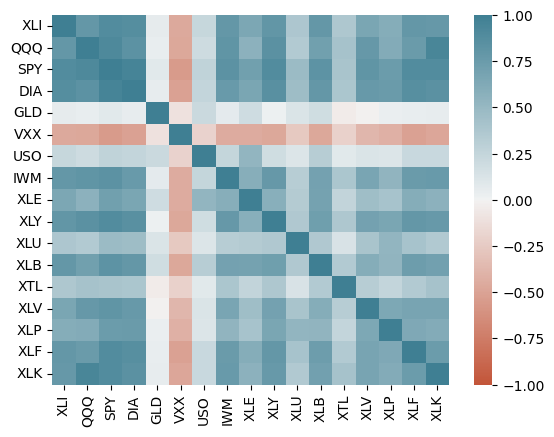

In [25]:
# Visually display the relationship between multiple variable using a heatmap
etfs = df.loc[df.index > '2012-07-01', df_symbols[df_symbols['sector'] == 'etf']['symbol']]

sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

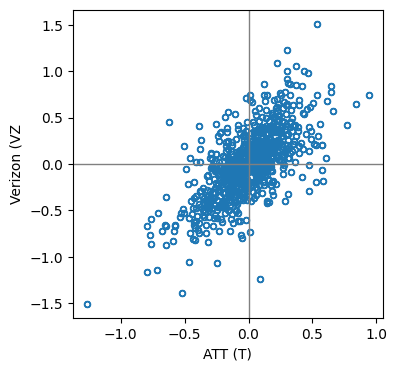

In [26]:
# Scatterplots
# The standard way to visualize the relationship between two measured data variables
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ')

# Draw horizontal and verical lines
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
